In [2]:
import pandas as pd
import altair as alt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

dwellings_ml = pd.read_csv("dwellings_ml.csv")


In [14]:
numbaths1980_df = dwellings_ml.value_counts(['before1980','numbaths']).reset_index().rename(columns={0:'count'})
numbaths1980_df["time_description"] = np.where(numbaths1980_df['before1980']==1, "Before 1980", "After 1980")
numbaths1980_df

,before1980,numbaths,count,time_description
0,1,2,6313,Before 1980
1,1,1,4767,Before 1980
2,0,3,3493,After 1980
3,1,3,2403,Before 1980
4,0,2,2002,After 1980
5,0,4,1787,After 1980
6,0,1,709,After 1980
7,1,4,625,Before 1980
8,0,5,424,After 1980
9,1,5,138,Before 1980


In [27]:
chart = (alt.Chart(numbaths1980_df)
        .encode(x= alt.X("numbaths", title = "Number of Bathrooms", ),
                y = alt.Y("count", title = "Number of Houses with x Num of Bathrooms", ),
                color= alt.Color("time_description",title="Year Built"))
        .mark_bar())

chart

alt.Chart(...)

In [23]:

# "X" or "independent"
features = dwellings_ml.drop(columns = ['before1980', 'yrbuilt','parcel', 'arcstyle_CONVERSIONS','gartype_det/CP','gartype_att/CP','arcstyle_SPLIT LEVEL','gartype_CP','totunits','arcstyle_TWO AND HALF-STORY','condition_Fair','condition_Excel','quality_X'	])

# "y" or "dependent" or "outcome"
targets = dwellings_ml.before1980

# %%
# split the data!
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = .34, random_state = 76)



In [11]:

# create the model
classifier = GaussianNB()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predicted = classifier.predict(x_test)

# evaluate model (see how good the model is)
metrics.accuracy_score(y_test, y_predicted)



0.6696187909125915

# Question 2

In [13]:
#A "Decision Tree" classifier

# create a classification model
classifier_DT = DecisionTreeClassifier(max_depth=10, random_state=1)

# train the model
classifier_DT.fit(x_train, y_train)

# use your model to make predictions!
y_predicted = classifier_DT.predict(x_test)

# test how accurate those predictions are
metrics.accuracy_score(y_test, y_predicted)



0.9005262482351432

# Question 3


In [16]:


#Look at the "feature importance". Aka, how important the model thinks the variables are.
feature_df = pd.DataFrame({'features':features.columns, 'importance':classifier_DT.feature_importances_})
feature_df.sort_values('importance', ascending = False)

,features,importance
37,arcstyle_ONE-STORY,0.313369
25,gartype_Att,0.157892
22,quality_C,0.143003
1,livearea,0.056106
5,stories,0.047285
3,basement,0.039730
0,abstrprd,0.028066
47,status_V,0.026513
9,sprice,0.021588
8,numbaths,0.020476


In [19]:
(alt.Chart(feature_df.sort_values('importance', ascending = False).head(10))
    .mark_bar()
    .encode(
        x= alt.X('importance:Q',title = "Importance"),
        y= alt.Y('features:N', title = "Features", sort='-x'),
        
        )
    .properties( title="Feature Importance from DT Model")
    )
    

alt.Chart(...)

## Question 4: Evaluate Model Performance

### Measure the accurracy
Acurracy = (2063+3998 / 6874) = 0.8817


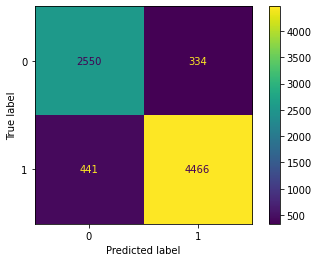

In [47]:
metrics.plot_confusion_matrix(classifier_DT, x_test, y_test)

### Balanced Accuracy

The accuracy of individual groups


recall = 
precision = 